In [1]:
!pip install deap
from deap import base
from deap import creator
from deap import tools
from deap import algorithms

import random
import array
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import tsp as tsputil

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 139 kB 11.3 MB/s 


In [ ]:
# create the desired traveling salesman problem instace:
TSP_NAME = "ch130" # name of problem
tsp = tsputil.TravelingSalesmanProblem(TSP_NAME)

In [3]:
# Genetic Algorithm constants:
POPULATION_SIZE = 500
MAX_GENERATIONS = 900
HALL_OF_FAME_SIZE = 1
P_CROSSOVER = 0.9 # probability for crossover 0.87
P_MUTATION = 0.1 # probability for mutating an individual 0.71

In [4]:
# Генерирует список ссылок для порядкового представления
def randomRefs(n):
  refs = []
  for i in range(n):
    refs.append(random.randint(0, n-i))
  return refs

In [5]:
def decode(refs):
  # упорядоченный список городов
  L = [x for x in range(len(refs))]
  T = []
  for i in refs:
    T.append(L.pop(i))
  return T

In [6]:
toolbox = base.Toolbox()

# define a single objective, minimizing fitness strategy:
creator.create("FitnessMin", base.Fitness, weights=(-1.0,))

# create the Individual class based on list of integers:
creator.create("Individual", array.array, typecode='i', fitness=creator.FitnessMin)

# create an operator that generates randomly shuffled indices:
toolbox.register("randomOrder", random.sample, range(len(tsp)), len(tsp))

# create the individual creation operator to fill up an Individual instance with shuffled indices:
toolbox.register("individualCreator", tools.initIterate, creator.Individual, toolbox.randomOrder)

# create the population creation operator to generate a list of individuals:
toolbox.register("populationCreator", tools.initRepeat, list, toolbox.individualCreator)

# fitness calculation - compute the total distance of the list of cities represented by indices:
def tpsDistance(individual):
  return tsp.getTotalDistance(individual), # return a tuple

toolbox.register("evaluate", tpsDistance)

In [7]:
# Genetic operators:
toolbox.register("select", tools.selTournament, tournsize=3)
toolbox.register("mate", tools.cxOrdered)
toolbox.register("mutate", tools.mutShuffleIndexes, indpb=1.0/len(tsp))

In [17]:
def eaComivoyager(cxpb=P_CROSSOVER, mutpb=P_MUTATION, ngen=MAX_GENERATIONS, n=POPULATION_SIZE):
  # set the random seed for repeatable results
  RANDOM_SEED = 12
  random.seed(RANDOM_SEED)

  # create initial population (generation 0):
  population = toolbox.populationCreator(n=n)

  # prepare the statistics object:
  stats = tools.Statistics(lambda ind: ind.fitness.values)
  stats.register("min", np.min)
  stats.register("avg", np.mean)

  # define the hall-of-fame object:
  hof = tools.HallOfFame(HALL_OF_FAME_SIZE)

  # perform the Genetic Algorithm flow with hof feature added:
  population, logbook = algorithms.eaSimple(population, toolbox, cxpb=cxpb, mutpb=mutpb, ngen=ngen, stats=stats, halloffame=hof, verbose=False)

  # print best individual info:
  best = hof.items[0]
  #print("-- Best Ever Individual = ", best)
  #print("-- Best Ever Fitness = ", best.fitness.values[0])
  return best, logbook

10 26640.650390625
20 22024.439453125
30 17587.849609375
40 18256.86328125
50 14679.3505859375
60 13939.86328125
70 14571.8154296875
80 12929.4970703125
90 12856.48046875
100 12793.4453125
150 11716.5517578125
200 16128.802734375
300 18619.80078125
500 19038.533203125


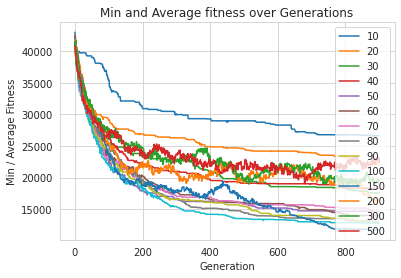

In [21]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
for ngen in [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 150, 200, 300, 500]:
  best, logbook = eaComivoyager(n=ngen)
  print(ngen, best.fitness.values[0])
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=ngen)
plt.legend()
plt.show()

0.1 16597.474609375
0.3 13352.0908203125
0.5 11651.982421875
0.7 10477.833984375
0.9 11716.5517578125


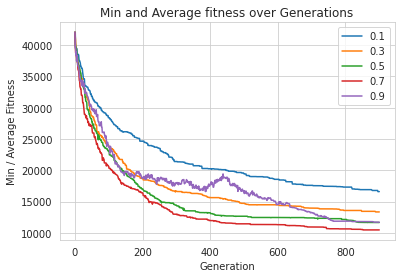

In [27]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
for cxpb in [0.1, 0.3, 0.5, 0.7, 0.9]:
  best, logbook = eaComivoyager(n=150, cxpb=cxpb)
  print(cxpb, best.fitness.values[0])
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=cxpb)
plt.legend()
plt.show()

0.01 13335.802734375
0.03 12346.8369140625
0.05 11583.82421875
0.07 11328.1572265625
0.09 13508.6630859375
0.1 10477.833984375
0.3 10423.7412109375


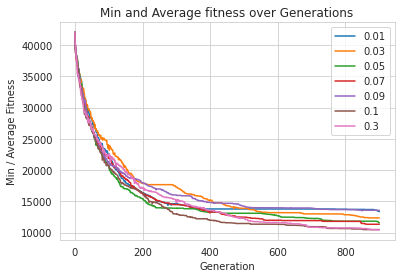

In [28]:
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')
for mutpb in [0.01, 0.03, 0.05, 0.07, 0.09, 0.1, 0.3]:
  best, logbook = eaComivoyager(n=150, cxpb=0.7, mutpb=mutpb )
  print(mutpb, best.fitness.values[0])
  # plot statistics:
  minFitnessValues = logbook.select("min")
  plt.plot(minFitnessValues, label=mutpb)
plt.legend()
plt.show()

-- Best Ever Individual =  10423.7412109375


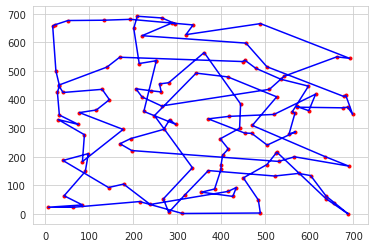

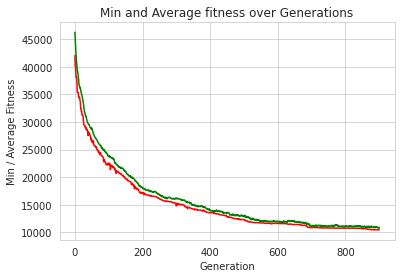

In [26]:
print("-- Best Ever Individual = ", best.fitness.values[0])
# plot best solution:
plt.figure(1)
tsp.plotData(best)

# plot statistics:
minFitnessValues, meanFitnessValues = logbook.select("min", "avg")
plt.figure(2)
sns.set_style("whitegrid")
plt.plot(minFitnessValues, color='red')
plt.plot(meanFitnessValues, color='green')
plt.xlabel('Generation')
plt.ylabel('Min / Average Fitness')
plt.title('Min and Average fitness over Generations')

# show both plots:
plt.show()